This project is about **Jobs** and **Salaries** in Data Science. Let's take a look at the csv file which contains some useful information:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("jobs_in_data.csv")

In [3]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

Cool. We can compare some salary based on the job category and experience level of the employee, for example.

In [ ]:
#talvez pro futuro: conseguir prever o salario de alguem que está entrando agora (ou entao dadas certas informaçoes, adivinhar o salario dele)
# usando conjunto de treinamento e teste etc.

In [4]:
df.value_counts('job_title')

job_title
Data Engineer                           2195
Data Scientist                          1989
Data Analyst                            1388
Machine Learning Engineer                991
Applied Scientist                        272
                                        ... 
Manager Data Management                    1
Cloud Data Architect                       1
Deep Learning Researcher                   1
Machine Learning Operations Engineer       1
Staff Machine Learning Engineer            1
Name: count, Length: 125, dtype: int64

In [60]:
mean_salaries = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
mean_salaries['salary_in_usd'] = mean_salaries['salary_in_usd'].round(2)

mean_salaries = mean_salaries.sort_values('salary_in_usd')
mean_salaries = mean_salaries.reset_index(drop=True)[['job_title', 'salary_in_usd']] # dropping the index column, we won't need it

mean_salaries

,job_title,salary_in_usd
0,Compliance Data Analyst,45000.00
1,Insight Analyst,47673.88
2,Machine Learning Specialist,55000.00
3,Data Operations Specialist,55355.00
4,Data Management Analyst,56000.00
...,...,...
120,AWS Data Architect,258000.00
121,Head of Machine Learning,259000.00
122,Managing Director Data Science,300000.00
123,Data Science Tech Lead,375000.00


Since we have 125 jobs titles, it is better to plot the head and tail of this dataset, otherwise the graph will be harmful to our eyes.

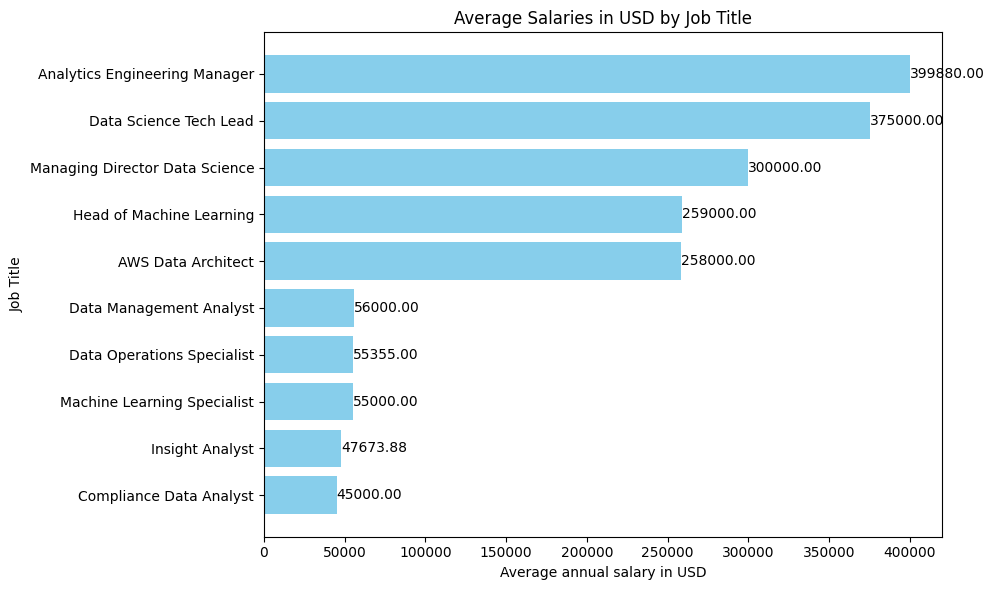

In [64]:
#only head and tail because we have 125 jobs :O

head = mean_salaries.head()
tail = mean_salaries.tail()

new_mean_salaries = pd.concat([head, tail])

jobs = new_mean_salaries['job_title']
salaries = new_mean_salaries['salary_in_usd']

plt.figure(figsize=(10, 6))
plt.barh(jobs, salaries, color='skyblue')

plt.xlabel("Average annual salary in USD")
plt.ylabel("Job Title")
plt.title("Average Salaries in USD by Job Title")

for index, value in enumerate(salaries):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black') # printing the salary next to the bar

plt.tight_layout()
plt.show()

Wow! As you can see, managers and tech leads earn the highest salaries ...

To be continued...